# [1.] Práctica II

Elaborar un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de las mismas.


# [2.] Obtención de los datos

## [2.1.] Funciones de utilidad

Importación de las librerías necesarias

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bartlett
from scipy.stats import pearsonr
from scipy.stats import levene
import matplotlib.pyplot as plt
import statsmodels.api as sm

Definición de la ruta base donde se lleerán, escribirán los ficheros.

In [2]:
def root_path( directory, file_name ):
    return '/home/jovyan/work/%s/%s.csv' % (directory, file_name )
    

Función **`export_dataframe`** que permite exportar el dataframe a fichero CSV

In [3]:
def export_dataframe( df, file_name, directory ):
    file = root_path( directory, file_name )
    df.to_csv(file )    
    

Funciones para leer los ficheros que contienen los dataset

In [4]:
def read_dataframe( file_name, directory ):
    file = root_path( directory, file_name )
    return pd.read_csv(file )
    

In [5]:
def read_subdataframe( file_name ):
    return read_dataframe( 
        file_name = file_name,
        directory = 'subdataset' 
    ).iloc[ : , 1:]

## [2.2.] _DATASET I_: Precio de Gas doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas doméstico: `data_gas_prices_household_consumers.csv`

Importación del subdataframe

In [6]:
data_gas_prices_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_household_consumers'
)

Columnas del dataset:

In [7]:
display( data_gas_prices_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [8]:
data_gas_prices_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,NaN,0.0311,0.0338,0.0258,0.0444


## [2.3.] _DATASET II_: Precio de Gas no doméstico en € por kw/h

Obtención de los datos del subdataset de los precios del gas no doméstico: `data_gas_prices_no_household_consumers.csv`

Importación del subdataframe

In [9]:
data_gas_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_gas_prices_no_household_consumers'
)

Columnas del dataset:

In [10]:
display( data_gas_prices_no_household_consumers.dtypes )

country          object
country_name     object
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [11]:
data_gas_prices_no_household_consumers.head( 10 )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,NaN,NaN,0.0257,0.0259,0.0248
2,BE,Belgium,NaN,NaN,0.0189,0.0148,0.0318
3,BG,Bulgaria,NaN,NaN,0.0213,0.0142,0.0299
4,CZ,Czechia,NaN,NaN,0.0226,0.0192,0.0259
5,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,0.0196,0.0171,0.0262
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.0448
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.0278
8,EE,Estonia,NaN,NaN,0.0213,0.0155,0.0352
9,EL,Greece,NaN,NaN,0.0260,0.0165,0.0337


## [2.4.] _DATASET III_: Precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh

Obtención de los datos del subdataset del precio de la electricidad doméstica para la franja de 2.500 a 4.999 kWh `data_electricity_prices_household_consumers.csv`


Importación del subdataframe

In [12]:
data_electricity_prices_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_household_consumers'
)

Columnas del dataset:

In [13]:
display( data_electricity_prices_household_consumers.dtypes )

country          object
country_name     object
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [14]:
data_electricity_prices_household_consumers.head(10)

,country,country_name,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AL,Albania,NaN,NaN,NaN,NaN,NaN,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,NaN,NaN,NaN,NaN,NaN,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,NaN,NaN,NaN,NaN,NaN,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,NaN,NaN,NaN,NaN,NaN,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,0.0760,0.0801,0.0727,0.0697,0.0898


## [2.5.] _DATASET IV_: Precio de la electricidad no doméstica

OObtención de los datos del subdataset del precio de la electricidad no doméstica `data_electricity_prices_no_household_consumers.csv`

Importación del subdataframe

In [15]:
data_electricity_prices_no_household_consumers = read_subdataframe(
    file_name = 'data_electricity_prices_no_household_consumers'
)

Columnas del dataset:

In [16]:
display( data_electricity_prices_no_household_consumers.dtypes )

country          object
country_name     object
2007-S2         float64
2008-S2         float64
2009-S2         float64
2010-S2         float64
2011-S2         float64
2012-S2         float64
2013-S2         float64
2014-S2         float64
2015-S2         float64
2016-S2         float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

Se muestran los 10 primeros valores:

In [17]:
data_electricity_prices_no_household_consumers.head( 10 )

,country,country_name,2007-S2,2008-S2,2009-S2,2010-S2,2011-S2,2012-S2,2013-S2,2014-S2,2015-S2,2016-S2,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0406,0.0489,0.0516,0.0440,0.0850


## [2.6.] Análisis inicial y procesamiento de los datos

### [2.6.1] Funciones de utilidad

Estimador utilizando la media **`median_estimator`**. Dentro de una columna del dataframe evalúa aquellos valores nulos y lo sustituye por la media de los valores que no lo son

In [18]:
def median_estimator( df, column ) :    
    median = df.loc[pd.notnull( df[column]), column].median()
    df[column].fillna(median,inplace=True)    
    return df    


Función **`show_boxplot`** que muestra el diagrama de caja de los valores de un dataframe


In [19]:
def show_boxplot( df ):
    sns.set_theme( style = "whitegrid" )
    ax = sns.boxplot( data = df )
    

Función **`init_outlier_max`**. Inializa el Outlier de una columna, inicializa a nulo el valor máximo de la columna

In [20]:
def init_outlier_max(df, column): 
    df.loc[
        df[column] == df[column].max(),
        column 
    ] = np.nan
    return df


Función **`init_outlier_min`**. Ininit_outlier_maxializa el Outlier de una columna, inicializa a nulo el valor mínnimo de la columna

In [21]:
def init_outlier_min(df, column): 
    df.loc[
        df[column] == df[column].min(),
        column 
    ] = np.nan
    return df


### [2.6.2] Datos de los costes del gas doméstico

Diagrama de caja para los diferentes años:

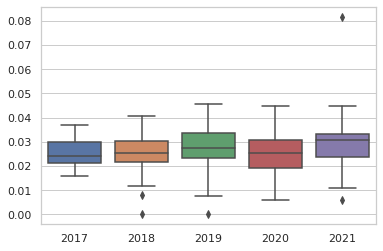

In [22]:
GasPricesHousehold = data_gas_prices_household_consumers

show_boxplot( GasPricesHousehold )

Detectamos valores extremos en los años 2018, 2019 y 2021, inicializamos valor

In [23]:
GasPricesHousehold = init_outlier_min(GasPricesHousehold, '2018')
#GasPricesHousehold = init_outlier_min(GasPricesHousehold, '2019')
#GasPricesHousehold = init_outlier_max(GasPricesHousehold, '2021')

Sustituimos NaN values por su media

In [24]:

GasPricesHousehold = median_estimator( GasPricesHousehold, '2021' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2020' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2019' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2018' )
GasPricesHousehold = median_estimator( GasPricesHousehold, '2017' )


Se muestran los 10 primeros valores:

In [25]:
display( GasPricesHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0360,0.0390,0.0455,0.0431,0.0448
5,DE,Germany (until 1990 former territory of the FRG),0.0243,0.0255,0.0278,0.0292,0.0293
6,DK,Denmark,0.0234,0.0259,0.0209,0.0160,0.0415
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0295,0.0303,0.0319,0.0302,0.0315
8,EE,Estonia,0.0234,0.0239,0.0253,0.0240,0.0361
9,EL,Greece,0.0243,0.0311,0.0338,0.0258,0.0444


Diagrama de caja para los diferentes años:

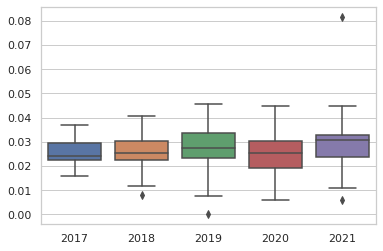

In [26]:
show_boxplot( GasPricesHousehold )

### [2.6.3] Datos de los costes del gas para empresas


Diagrama de caja para los diferentes años:

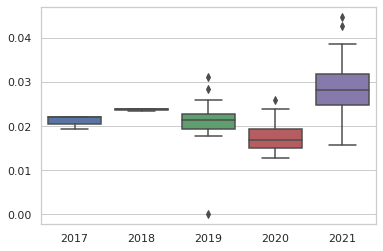

In [27]:
GasPricesNoHousehold = data_gas_prices_no_household_consumers

show_boxplot( GasPricesNoHousehold )

Detectamos valores extremos en los años 2019 y 2021, inicializamos valor

In [28]:
GasPricesNoHousehold = init_outlier_min(GasPricesNoHousehold, '2019')
GasPricesNoHousehold = init_outlier_max(GasPricesNoHousehold, '2021')

Sustituimos NaN values por su media

In [29]:
GasPricesNoHousehold = data_gas_prices_no_household_consumers

GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2021' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2020' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2019' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2018' )
GasPricesNoHousehold = median_estimator( GasPricesNoHousehold, '2017' )

Se muestran los 10 primero valores:

In [30]:
display( GasPricesNoHousehold.head(10) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0220,0.0240,0.0184,0.0168,0.02970
1,BA,Bosnia and Herzegovina,0.0220,0.0240,0.0257,0.0259,0.02480
2,BE,Belgium,0.0220,0.0240,0.0189,0.0148,0.03180
3,BG,Bulgaria,0.0220,0.0240,0.0213,0.0142,0.02990
4,CZ,Czechia,0.0220,0.0240,0.0226,0.0192,0.02590
5,DE,Germany (until 1990 former territory of the FRG),0.0220,0.0240,0.0196,0.0171,0.02620
6,DK,Denmark,0.0194,0.0234,0.0178,0.0137,0.02795
7,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0220,0.0240,0.0211,0.0175,0.02780
8,EE,Estonia,0.0220,0.0240,0.0213,0.0155,0.03520
9,EL,Greece,0.0220,0.0240,0.0260,0.0165,0.03370


Se vuelve a mostrar el diagrama de caja para los diferentes años:

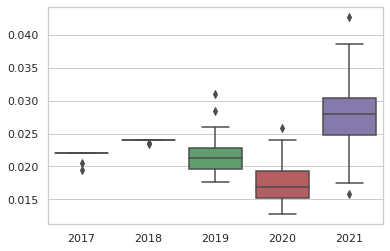

In [31]:
show_boxplot( GasPricesNoHousehold )

### [2.6.4] Datos de los costes de la electricidad doméstica


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [32]:
ElectPricesHouseholds = data_electricity_prices_household_consumers.drop(
    [
     '2012-S2',
     '2013-S2',
     '2014-S2',
     '2015-S2',
     '2016-S2'
    ], axis=1
)

Muestra de los 10 primeros valores

In [33]:
display( ElectPricesHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AL,Albania,0.0713,0.0759,0.0778,NaN,0.0781
1,AT,Austria,0.0613,0.0623,0.0687,0.0732,0.0745
2,BA,Bosnia and Herzegovina,0.0342,0.0338,0.0361,0.0365,NaN
3,BE,Belgium,0.0735,0.0808,0.0859,0.0786,0.0844
4,BG,Bulgaria,0.0575,0.0585,0.0558,0.0560,0.0608
5,CY,Cyprus,0.1036,0.1157,0.1241,0.1042,0.1094
6,CZ,Czechia,0.0541,0.0570,0.0690,0.0749,0.0979
7,DE,Germany (until 1990 former territory of the FRG),0.0686,0.0622,0.0581,0.0574,0.0803
8,DK,Denmark,0.0388,0.0503,0.0539,0.0409,0.0747
9,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0760,0.0801,0.0727,0.0697,0.0898


Se muestra el diagrama de caja

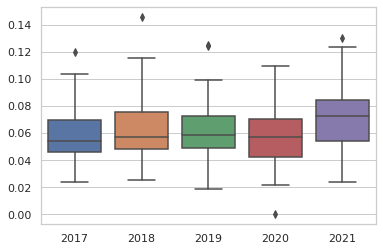

In [34]:
show_boxplot( ElectPricesHouseholds )

Detectamos valores extremos en los años 2018, 2019 y 2020, inicializamos valor

In [35]:
ElectPricesHouseholds = init_outlier_max(ElectPricesHouseholds, '2018')
ElectPricesHouseholds = init_outlier_max(ElectPricesHouseholds, '2019')
ElectPricesHouseholds = init_outlier_min(ElectPricesHouseholds, '2020')

 Estimamos valores nulos por la media

In [36]:
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2021' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2020' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2019' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2018' )
ElectPricesHouseholds = median_estimator( ElectPricesHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

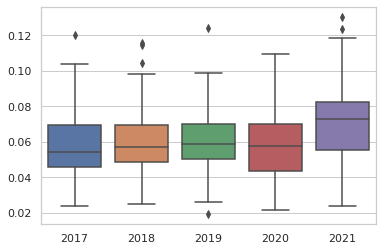

In [37]:
show_boxplot( ElectPricesHouseholds )

### [2.6.5] Datos de los costes de la electricidad para empresas


Se eliminan las columnas correspondientes a los valores semestrales de lo años desde el 2012 al 2016 que no contienen datos

In [38]:
ElectPricesNoHouseholds = data_electricity_prices_no_household_consumers.drop(
    [
        '2007-S2',
        '2008-S2',
        '2009-S2',
        '2010-S2',
        '2011-S2',
        '2012-S2',
        '2013-S2',
        '2014-S2',
        '2015-S2',
        '2016-S2'
    ], axis=1
)

Se muestra el diagrama de caja

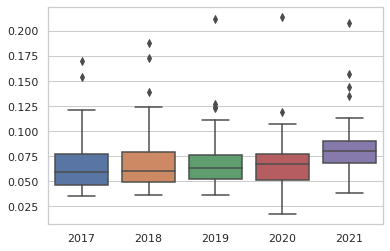

In [39]:
show_boxplot( ElectPricesNoHouseholds )

Muestra de los 10 primeros valores

In [40]:
display( ElectPricesNoHouseholds.head( 10 ) )

,country,country_name,2017,2018,2019,2020,2021
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,NaN
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075
4,CY,Cyprus,0.1187,0.1240,0.1271,0.1055,0.1136
5,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848
6,DE,Germany (until 1990 former territory of the FRG),0.0468,0.0612,0.0525,0.0651,0.0707
7,DK,Denmark,0.0433,0.0514,0.0517,0.0426,0.0898
8,EA,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",0.0757,0.0837,0.0794,0.0780,0.0893
9,EE,Estonia,0.0406,0.0489,0.0516,0.0440,0.0850


Detectamos Outlier en los valores de los años 1017, 2018, 2019, 2020 y 2021 y lo inicializamos 

In [41]:
ElectPricesHouseholds = init_outlier_max(ElectPricesNoHouseholds, '2017')
ElectPricesHouseholds = init_outlier_max(ElectPricesNoHouseholds, '2018')
ElectPricesHouseholds = init_outlier_max(ElectPricesNoHouseholds, '2019')
ElectPricesHouseholds = init_outlier_max(ElectPricesNoHouseholds, '2020')
ElectPricesHouseholds = init_outlier_max(ElectPricesNoHouseholds, '2021')

Se evaluan con el estimador de la media los valores nulos

In [42]:
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2021' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2020' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2019' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2018' )
ElectPricesNoHouseholds = median_estimator( ElectPricesNoHouseholds, '2017' )


Se vuelve a mostrar el diagrama de caja

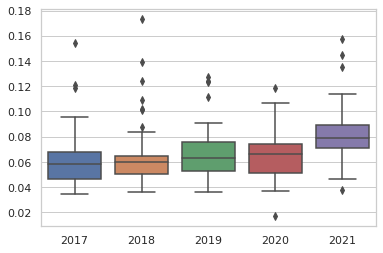

In [43]:
show_boxplot( ElectPricesNoHouseholds )

### [2.6.6.] _Conclusión de análisis inicial de datos:_

Descartamos continuar el análisis del "Gas" en el caso de los precios de los consumos de las empresas, ya que los datos obtenidos son una muestra demasiado pequeña, en concreto en los años 2017 y 2018 (ver dataset [data_gas_prices_no_household_consumers.csv](subdataset/data_gas_prices_no_household_consumers.csv)).

## [2.7.] Generación del dataset Final de trabajo

Generamos El Dataset final a exportar, con los datos posibles 

In [44]:
dElectCol = pd.merge(
    ElectPricesHouseholds, 
    ElectPricesNoHouseholds.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_ElectHouse', '_ElectNoHouse')
)

dGasCol = pd.merge(
    GasPricesHousehold.drop(['country_name'], axis=1), 
    GasPricesNoHousehold.drop(['country_name'], axis=1), 
    on='country',
    suffixes=('_GasHouse', '_GasNoHouse')
)

dEnergyCol = pd.merge(
    dElectCol, 
    dGasCol, 
    on='country'
)


Mostramos el dataset final a publicar:

In [45]:
dEnergyCol.head()

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_ElectNoHouse,2018_ElectNoHouse,2019_ElectNoHouse,...,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse,2017_GasNoHouse,2018_GasNoHouse,2019_GasNoHouse,2020_GasNoHouse,2021_GasNoHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0598,0.0610,0.0654,...,0.0299,0.0304,0.0312,0.0308,0.0316,0.022,0.024,0.0184,0.0168,0.0297
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0649,0.0621,0.0624,...,0.0240,0.0240,0.0249,0.0258,0.0251,0.022,0.024,0.0257,0.0259,0.0248
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0672,0.0624,0.0663,...,0.0283,0.0288,0.0289,0.0252,0.0315,0.022,0.024,0.0189,0.0148,0.0318
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0817,0.0810,0.0764,...,0.0170,0.0209,0.0240,0.0177,0.0331,0.022,0.024,0.0213,0.0142,0.0299
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0580,0.0602,0.0721,...,0.0360,0.0390,0.0455,0.0431,0.0448,0.022,0.024,0.0226,0.0192,0.0259


Columnas del dataset a Publicar:

In [46]:
display( dEnergyCol.dtypes )

country               object
country_name          object
2017_ElectHouse      float64
2018_ElectHouse      float64
2019_ElectHouse      float64
2020_ElectHouse      float64
2021_ElectHouse      float64
2017_ElectNoHouse    float64
2018_ElectNoHouse    float64
2019_ElectNoHouse    float64
2020_ElectNoHouse    float64
2021_ElectNoHouse    float64
2017_GasHouse        float64
2018_GasHouse        float64
2019_GasHouse        float64
2020_GasHouse        float64
2021_GasHouse        float64
2017_GasNoHouse      float64
2018_GasNoHouse      float64
2019_GasNoHouse      float64
2020_GasNoHouse      float64
2021_GasNoHouse      float64
dtype: object

### [2.7.1.] Exportación dataset Final en formato CSV

In [47]:
export_dataframe( 
    df = dEnergyCol, 
    file_name = 'energy_price_dataset', 
    directory = 'dataset' 
) 

# [3.] Dataset a analizar a partir del dataset publicado

De las conclusiones del anterior estudio vemos que no hay suficientes datos en los datos relativos al precio del gas de las empresas para poder hacer un análisis. Decimos entonces continuar sólo con los datos que hacen referencia a los precios del gas y de la electricidad relativos a entornos domésticos.

Costruimos un dataset filtrando solo estos datos, eliminando los datos relativos al precio del gas y a la electricidad de las empresas en el dataset original y también se eliminan los datos acumulados relativos a la Unión Europea:

In [48]:
dEnergyHouseCol = dEnergyCol.loc[
                  : ,~dEnergyCol.columns.str.endswith('NoHouse')
                ].loc[
                  (dEnergyCol["country"] != "EU27_2020" )
                ].loc[
                  (dEnergyCol["country"] != "EA" )
                ]

Columnas del dataset a Analizar:

In [49]:
display( dEnergyHouseCol.dtypes )

country             object
country_name        object
2017_ElectHouse    float64
2018_ElectHouse    float64
2019_ElectHouse    float64
2020_ElectHouse    float64
2021_ElectHouse    float64
2017_GasHouse      float64
2018_GasHouse      float64
2019_GasHouse      float64
2020_GasHouse      float64
2021_GasHouse      float64
dtype: object

Se presenta una muestra del dataset filtrando sólamente los datos domésticos

In [50]:
display( dEnergyHouseCol.head() )

,country,country_name,2017_ElectHouse,2018_ElectHouse,2019_ElectHouse,2020_ElectHouse,2021_ElectHouse,2017_GasHouse,2018_GasHouse,2019_GasHouse,2020_GasHouse,2021_GasHouse
0,AT,Austria,0.0598,0.0610,0.0654,0.0702,0.0723,0.0299,0.0304,0.0312,0.0308,0.0316
1,BA,Bosnia and Herzegovina,0.0649,0.0621,0.0624,0.0648,0.0793,0.0240,0.0240,0.0249,0.0258,0.0251
2,BE,Belgium,0.0672,0.0624,0.0663,0.0745,0.0890,0.0283,0.0288,0.0289,0.0252,0.0315
3,BG,Bulgaria,0.0817,0.0810,0.0764,0.0730,0.1075,0.0170,0.0209,0.0240,0.0177,0.0331
4,CZ,Czechia,0.0580,0.0602,0.0721,0.0811,0.0848,0.0360,0.0390,0.0455,0.0431,0.0448


# [4.] Análisis de los datos

## [4.1.] Selección del grupo de datos

Teniendo por un lado un histórico de los precios de la electricidad y por otro los precios del gas por cada país. Se pretende hacer un estudio de la relación que existe entre ambos precios, tanto año a año como utilizando todos los registros de todos los años.

Para ello se procesa el dataset de los datos de precios de la energia doméstica para que cada registro tenga la información del país, del año y ambos precios.

### [4.1.1.] Crear el dataset de trabajo

Primero se crea una función`reduce_dataset` que permite añadir los precios de la electricidad y del gas. Cada registro tendrá la información del país, del año que se pasa como argumento, al que se refieren los precios, y las columnas del precio del gas y la electricidad. 

In [51]:
def reduce_dataset( original_df, year ):
    # Nombre de las columnas de la electricidad y gas del año pasado por argumento
    column_name_electricity =  '%s_ElectHouse' % year
    column_name_gas =  '%s_GasHouse' % year 
    # Se obtiene las columnas relacionas con el país, el precio de la electricidad y el gas
    df =  original_df.loc[:,['country', column_name_electricity , column_name_gas]]
    # Se añade la columna del año
    df['Year'] = year    
    # Se renombran las columnas de electricidad y gas por precio de electricidad y gas respectivamente
    return df.rename(
        columns= { 
                    column_name_electricity: "ElectricityPrice", 
                    column_name_gas        : "GasPrice"  
                 }
    )

Se concatenan todos los años para crear el dataset de trabajo. También se resetea el índice del dataframe creado.

In [52]:
df_work = pd.concat(    
    [
        reduce_dataset( dEnergyHouseCol, 2017 ),
        reduce_dataset( dEnergyHouseCol, 2018 ),
        reduce_dataset( dEnergyHouseCol, 2019 ),
        reduce_dataset( dEnergyHouseCol, 2020 ),
        reduce_dataset( dEnergyHouseCol, 2021 )
    ]
)

df_work.reset_index(drop=True, inplace=True)

Se muestra los tipos de las columnas del dataset

In [53]:
display( df_work.dtypes )

country              object
ElectricityPrice    float64
GasPrice            float64
Year                  int64
dtype: object

Se muestra un ejemplo de los datos del dataset de trabajo que consta de 160 registros

In [54]:
display( df_work )

,country,ElectricityPrice,GasPrice,Year
0,AT,0.0598,0.0299,2017
1,BA,0.0649,0.0240,2017
2,BE,0.0672,0.0283,2017
3,BG,0.0817,0.0170,2017
4,CZ,0.0580,0.0360,2017
...,...,...,...,...
155,SI,0.0641,0.0264,2021
156,SK,0.0725,0.0195,2021
157,TR,0.0518,0.0110,2021
158,UA,0.0793,0.0306,2021


### [4.1.2.] Diagrama de dispersión entre los precios de la electricidad y el gas

Para comprobar la dependencia y la correlación entre los precios de la electricidad y el gas de manera gráfica, se muestra el diagrama de dispersión.

Para ello se crean dos funciones, `dispersion_graph` que permite la generación del diagrama de dispersión del precio de la electricidad con respecto del gas y `dispersion_graph` que permite generar todos los diagramas de los registros por año.

Para este filtrado se utiliza la función `filter_by_year` que filtra los datos del dataset de trabajo de un año determinado. Esta función se usará en pasos posteriores.

In [55]:
def filter_by_year( df, year ):
    return df.loc[(df.Year == year)]

def dispersion_graph( df, title, ax ):
    df.plot(kind='scatter', x ="GasPrice", y = "ElectricityPrice",  color = "blue", ax = ax)
    plt.title( title  )
    
def dispersion_graph_by_year( df_work, ncolumns = 2 ):
    years = df_work.Year.unique()
    ntotal = len( years  )
    nrows = ntotal //  ncolumns
    nrows = nrows if ( ntotal %  ncolumns == 0 ) else  nrows + 1
    index = 1
    for yr in years: 
        ax1 = plt.subplot(nrows, ncolumns, index )
        dispersion_graph( filter_by_year( df_work, yr ), title= "Year %s" % yr, ax = ax1 )
        index = index + 1

Diagrama de dispersión del precio de la electricidad con respecto al gas para cada año del dataset

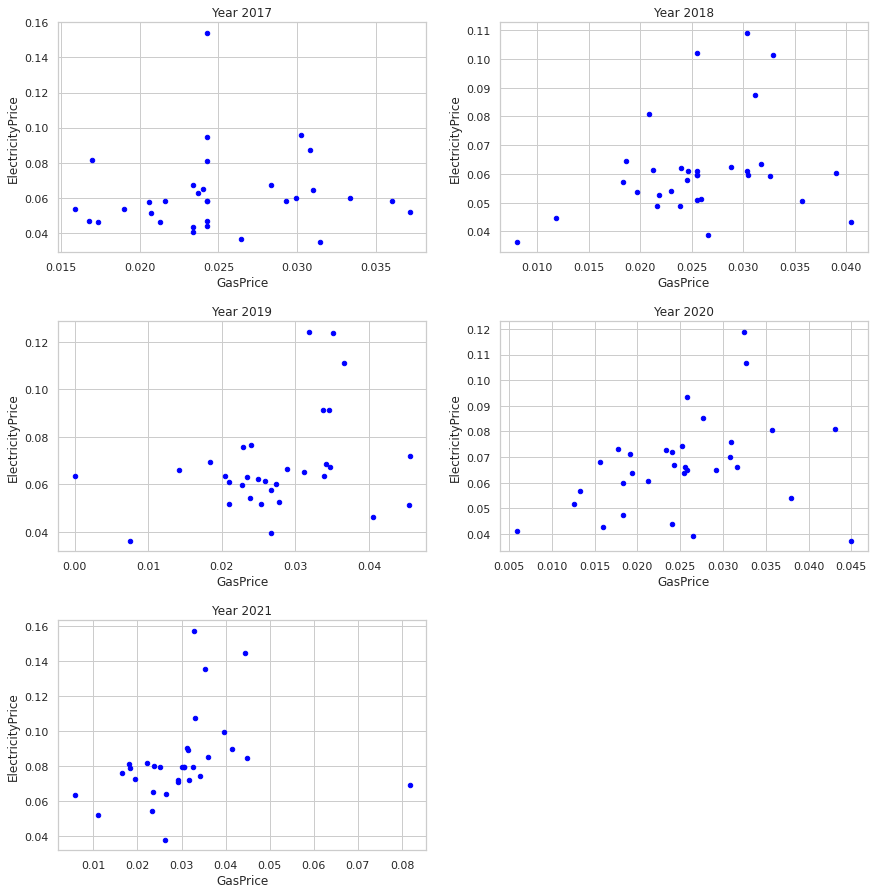

In [56]:
dispersion_graph_by_year( df_work )
plt.subplots_adjust( wspace = 0.2, hspace= 0.3, right = 2, top = 3)
plt.show()

Se crea el diagrama también para todos los registros sin filtrar por año.

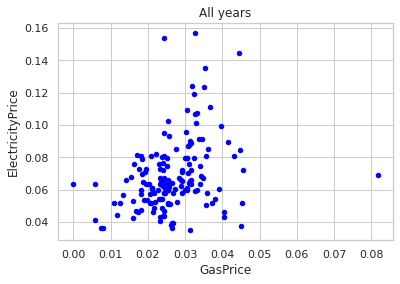

In [57]:
dispersion_graph( df_work, title= "All years", ax = None )
plt.show()

Como se puede apreciar en cada uno de los gráficos anteriores, hay una distribución uniforme y no se intuye una dependencia y correlación entre los dos precios.

### [4.1.3.] Valores de los precios de la electricidad

Se crea una función de utilidad `get_electricityPrice` que permitirá obtener los datos de la electricidad a partir de un datafra en el formato necesario para poder ejecutar las funciones de modelos en pasos posteriores.

In [58]:
def get_electricityPrice( df ):    
    return df.loc[:, "ElectricityPrice"].to_numpy() 

display( get_electricityPrice( df_work ) )


array([0.0598 , 0.0649 , 0.0672 , 0.0817 , 0.058  , 0.0468 , 0.0433 ,
       0.0406 , 0.081  , 0.1541 , 0.0641 , 0.0581 , 0.0574 , 0.0536 ,
       0.0959 , 0.0949 , 0.0461 , 0.0581 , 0.0515 , 0.0675 , 0.0517 ,
       0.0581 , 0.0629 , 0.0599 , 0.0468 , 0.0364 , 0.0348 , 0.044  ,
       0.0464 , 0.0533 , 0.0581 , 0.0871 , 0.061  , 0.0621 , 0.0624 ,
       0.081  , 0.0602 , 0.0612 , 0.0514 , 0.0489 , 0.0876 , 0.05975,
       0.0636 , 0.0364 , 0.0613 , 0.0573 , 0.1091 , 0.1022 , 0.0488 ,
       0.058  , 0.054  , 0.0646 , 0.0505 , 0.05975, 0.0609 , 0.0593 ,
       0.0539 , 0.0389 , 0.0434 , 0.051  , 0.0526 , 0.0446 , 0.05975,
       0.1015 , 0.0654 , 0.0624 , 0.0663 , 0.0764 , 0.0721 , 0.0525 ,
       0.0517 , 0.0516 , 0.0912 , 0.1242 , 0.0685 , 0.0363 , 0.0756 ,
       0.0695 , 0.1236 , 0.1112 , 0.0542 , 0.0615 , 0.0597 , 0.0609 ,
       0.0515 , 0.06345, 0.0602 , 0.0674 , 0.0636 , 0.0395 , 0.0462 ,
       0.0577 , 0.0633 , 0.066  , 0.06345, 0.0912 , 0.0702 , 0.0648 ,
       0.0745 , 0.07

### [4.1.4.] Valores de los precios del gas

Se crea la función `get_gasPriceValues` similar a la anterior pero en este caso extrayendo los precios del gas.


In [59]:
def get_gasPriceValues( df ):    
    return df.loc[:, "GasPrice"].to_numpy() 

display( get_gasPriceValues( df_work ) )


array([0.0299 , 0.024  , 0.0283 , 0.017  , 0.036  , 0.0243 , 0.0234 ,
       0.0234 , 0.0243 , 0.0243 , 0.031  , 0.0243 , 0.0206 , 0.019  ,
       0.0302 , 0.0243 , 0.0174 , 0.0216 , 0.0207 , 0.0234 , 0.0371 ,
       0.0293 , 0.0237 , 0.0333 , 0.0168 , 0.0264 , 0.0314 , 0.0243 ,
       0.0213 , 0.0159 , 0.0243 , 0.0308 , 0.0304 , 0.024  , 0.0288 ,
       0.0209 , 0.039  , 0.0255 , 0.0259 , 0.0239 , 0.0311 , 0.0255 ,
       0.0317 , 0.008  , 0.0212 , 0.0183 , 0.0304 , 0.0255 , 0.0216 ,
       0.0245 , 0.023  , 0.0186 , 0.0357 , 0.0305 , 0.0246 , 0.0326 ,
       0.0197 , 0.0266 , 0.0405 , 0.0255 , 0.0218 , 0.0118 , 0.0255 ,
       0.0329 , 0.0312 , 0.0249 , 0.0289 , 0.024  , 0.0455 , 0.0278 ,
       0.0209 , 0.0253 , 0.0338 , 0.0318 , 0.0342 , 0.0075 , 0.0229 ,
       0.0184 , 0.0351 , 0.0366 , 0.0238 , 0.0258 , 0.0227 , 0.021  ,
       0.0454 , 0.0339 , 0.0274 , 0.0347 , 0.0204 , 0.0267 , 0.0405 ,
       0.0267 , 0.0234 , 0.0142 , 0.     , 0.0346 , 0.0308 , 0.0258 ,
       0.0252 , 0.01

## [4.2.] Análisis de la normalidad y homogeneidad de la varianza

### [4.2.1.] Normalidad

#### [4.2.1.1.] Análisis gráfico

Para poder comprobar la normalidad de las muestras se crean los gráficos cuartil-cuartil, tanto de las poblaciones de los precios de la electricidad como las del gas. Se crean dos funciones `draw_grap_quartil_quartil` que crea los dos gráficos correspondientes a las dos poblaciones y `draw_grap_quartil_quartil_by_year` que crea los gráficos para los registros de los diferentes años.

In [60]:
def quartil_quartil_graph( data, title, ax ):    
     sm.qqplot( data, line='q', ax = ax )
     plt.title( title )   

def draw_grap_quartil_quartil( df, title ):
    electricityPriceValues = df.loc[:, "ElectricityPrice"].to_numpy() 
    gasPriceValues = df.loc[:, "GasPrice"].to_numpy()
    ax1 = plt.subplot( 1, 2, 1 )
    quartil_quartil_graph( electricityPriceValues, "%s Electricy Prices" % title, ax1 ) 
    ax2 = plt.subplot( 1, 2, 2 ) 
    
    quartil_quartil_graph( gasPriceValues, "%s Gas Prices" % title, ax2 )
    plt.subplots_adjust(left=-1)
    plt.show()
    
def draw_grap_quartil_quartil_by_year( df ):
    years = df.Year.unique() 
    for yr in years :
        current_df = filter_by_year( df, yr )
        draw_grap_quartil_quartil( current_df, yr )


Diagramas cuartil-cuartil de los precios de la electricidad y del gas para todos los años

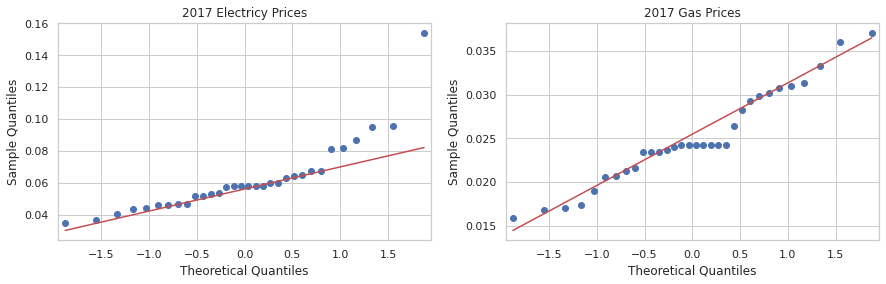

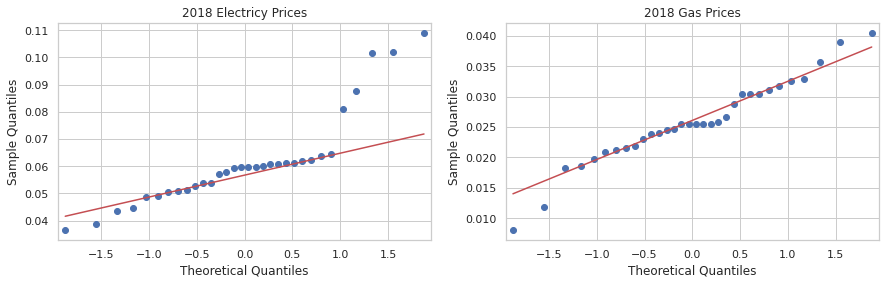

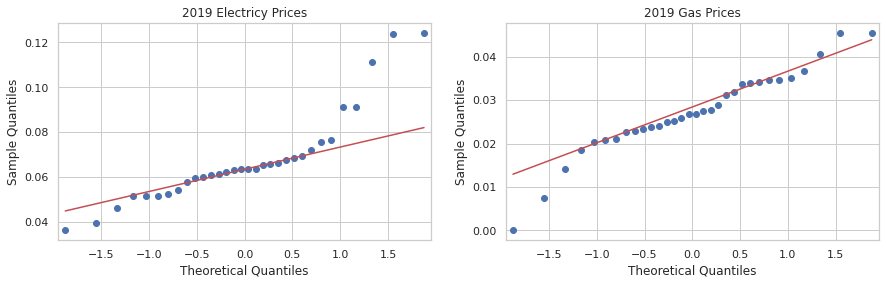

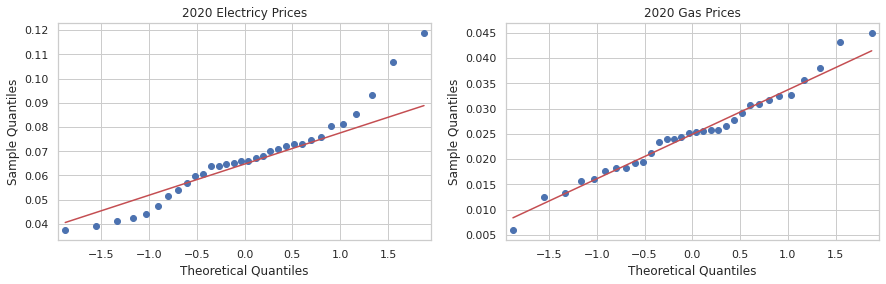

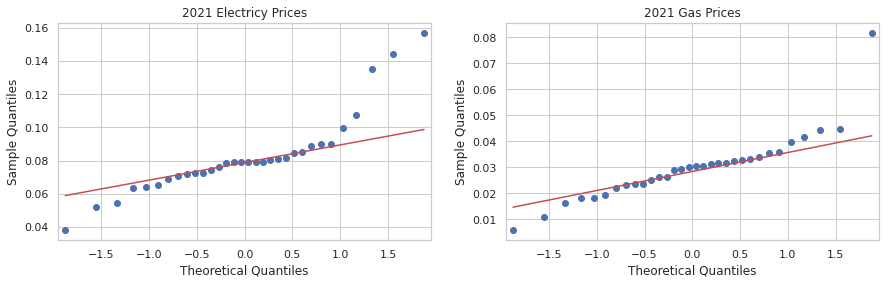

In [61]:
draw_grap_quartil_quartil_by_year( df_work )

Diagramas cuartil-cuartil de los precios de la electricidad y del gas para todos los años

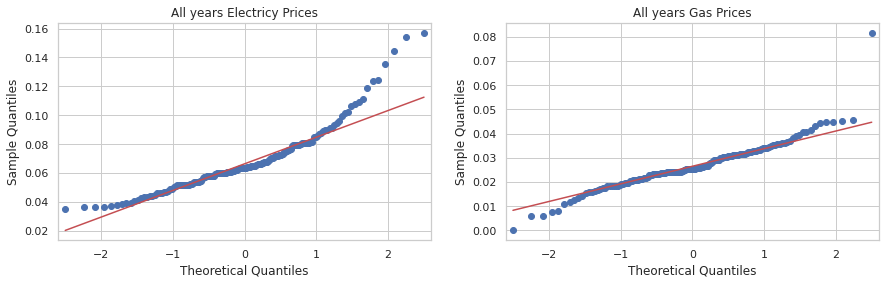

In [62]:
draw_grap_quartil_quartil( df_work, "All years" )

Cómo se puede observar hay algunos gráficos que se ajustan más a la línea ideal de una distribución normal. En general los precios del gas se ajustan más a esa línea, mientras que para los precios de la electricidad divergen al principio y al final de la gráfica.

#### [4.2.1.2.] Test de Shapiro-Wilk

Los valores de los precios de la electricidad son valores continuos por lo que primeros se comprobará la normalidad de manera cuantitativa de ambas muestras gracias al test de  Shapiro-Wilk.

El test de Shapiro-Will:

> **Hipótesis nula** `H_0`: _La muestra proviene de una población normalmente distribuida_.   
  **Hipótesis alternativa** `H_1`: _La muestra **no** proviene de una población normalmente distribuida_
  
Se crea una función `test_shapiroWilk` que ejecutará el test de Shapiro-Wilk y que devolverá `True` cuando no se acepte la hipótesis nula (población normalmente distribuidad) y `False` cuando se rechace y se acepte la alternativa (población no normalmente distribuida)

In [63]:
def test_shapiroWilk( values ):
    st, pvalue = stats.shapiro( values )
    print(  "  Test Shapiro-Wil" )
    if pvalue >= 0.05 :
        print( "   The sample comes from a normal distribution\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   The sample DOES NOT come from a normal distribution\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False


#### [4.2.1.3.] Aplicación Teorema del límite central

Este teorema establece que el contraste de hipótesis sobre la media de una muestra se aproxima a una distribución normal aunque la población original no siga una distribución normal, siempre que el tamaño de la muestra n sea suficientemente grande. Por suficientemente grande, se suele contemplar superior a 30 elementos, `n > 30`.

Se crea la función `isApply_central_limit_theorem` que aplica este teŕema comprobando el tamaño de la muestra. Si es mayor que 30, la muestra tiende a una distribución normal y devolverá `True`, devolverá `False` cuando no sea así.

In [64]:
def isApply_central_limit_theorem( values ):    
    print(  "  Test Central Limit Theorem" )
    if  len( values) > 30 :
        print( "   The sample tends to a normal distribution")
        return True
    else: 
        print( "   The sample DOES NOT tend to a normal distribution")
        return False  


#### [4.2.1.4.] Comprobación de la normalidad

Para comprobar la normalidad se crean unas funciones auxiliares `execute_test_normality` y `check_normality_by_year`  que permiten ejecutar los dos test, Shapiro-Wilk y si este falla el del límite central para comprobar ambas distribuciones de precios, filtrando por año y también para todos los registros.

In [65]:
def check_normality( values ):
    return test_shapiroWilk( values ) or isApply_central_limit_theorem( values )

def execute_test_normality( df, title ):
    
    def execute( values ):
        res = check_normality( values )
        print( " > Is a normally distributed population? %s" % res )
        return res
    
    result = {}
        
    print( title )
    print( " --- ---" )
    print( " - Electricity price:" )
    result["Electricity"] = execute( get_electricityPrice( df ) )
    print( " --- ---" )
    print( " - Gas price:" )
    result["Gas"] = execute( get_gasPriceValues( df ) )
    print( " --- --- --- --- --- --- " )   
    return result

def check_normality_by_year( df ):
    years = df.Year.unique() 
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res = execute_test_normality( current_df, "* Test normality poblation prices year %s" % yr )
        result[yr] = res
    return result
        

Se comprueba la normalidad de los precios de la electricidad y gas por cada año del dataset

In [66]:
check_normality_by_year( df_work )

* Test normality poblation prices year 2017
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   The sample DOES NOT come from a normal distribution
    (p-value = 2.555926766945049e-05, stats = 0.7890611290931702)
  Test Central Limit Theorem
   The sample tends to a normal distribution
 > Is a normally distributed population? True
 --- ---
 - Gas price:
  Test Shapiro-Wil
   The sample comes from a normal distribution
    (p-value = 0.19534516334533691, stats = 0.9546711444854736)
 > Is a normally distributed population? True
 --- --- --- --- --- --- 
* Test normality poblation prices year 2018
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   The sample DOES NOT come from a normal distribution
    (p-value = 0.00015152126434259117, stats = 0.8291653394699097)
  Test Central Limit Theorem
   The sample tends to a normal distribution
 > Is a normally distributed population? True
 --- ---
 - Gas price:
  Test Shapiro-Wil
   The sample comes from a normal distribution
    (p-value = 

{2017: {'Electricity': True, 'Gas': True},
 2018: {'Electricity': True, 'Gas': True},
 2019: {'Electricity': True, 'Gas': True},
 2020: {'Electricity': True, 'Gas': True},
 2021: {'Electricity': True, 'Gas': True}}

Se ejecuta tambvién el test para todo el dataset

In [67]:
execute_test_normality( df_work, "All years" )

All years
 --- ---
 - Electricity price:
  Test Shapiro-Wil
   The sample DOES NOT come from a normal distribution
    (p-value = 1.4402387060741262e-09, stats = 0.8893610239028931)
  Test Central Limit Theorem
   The sample tends to a normal distribution
 > Is a normally distributed population? True
 --- ---
 - Gas price:
  Test Shapiro-Wil
   The sample DOES NOT come from a normal distribution
    (p-value = 6.063753232865565e-08, stats = 0.9167400002479553)
  Test Central Limit Theorem
   The sample tends to a normal distribution
 > Is a normally distributed population? True
 --- --- --- --- --- --- 


{'Electricity': True, 'Gas': True}

Se puede observar que todas las distribuciones tienen a la normalidad. Algunas de las poblaciones cumplen la normalidad por el test de Shapiro-Wil sin necesidad de recurrir al límite central. Estas son los precios del gas todos los años incluido el dataset golbal y de la electricidad en el año 2020.

El resto cumple la normalidad por aplicación del teorema del límite central ya que todas las poblaciones tienen más de 30 registros. También el conjunto de todos los precios de la electricidad tiene a una distribución normal por este teorema.

### [4.2.2.] Homogeniedad de la varianza

Ya que se ambas distribuciones se aproximan a una distribución normal, se utiliza el test de _Levene_ en el que:

> **Hipótesis nula**, `H_0`: _Las varianzas de las poblaciones son la mismas._   
   **Hipótesis alternativa** `H_1`: _Las varianzas de las poblaciones **no** son la mismas._

Un valor por debajo del valor significativo (`α = 0,05`) hace que se rechaze la hipótesis nula y se llege a la conclusión de que existe una diferencia en la varianza de las poblaciones.

Para comprobar la homogeniedad de las varianzas de las poblaciones de los precios del gas y la electricidad se ha creado la función `test_levene` que devolverá `True` cuando se acepte la hipétesis nula y las varianzas de las poblaciones es la misma.

Se crean además dos funciones de utilidad `execute_test_homocedasticity` y `execute_test_homocedasticity_by_year` que permite ejecutar el test para un dataset o para los valores de cada año

In [68]:
def test_levene( electricityPriceValues, gasPriceValues ) :
    st, pvalue = stats.levene( electricityPriceValues, gasPriceValues )
    print(  "  Test Levene" )
    if pvalue >= 0.05 :
        print( "   The populations have the SAME variance.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   The population variances are DIFFERENT.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_homocedasticity( df, title ):
    print( title )
    print( " --- ---" )
    res = test_levene( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > Is the variance the same? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_homocedasticity_by_year( df ):
    years = df.Year.unique() 
    result = dict()
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_homocedasticity( current_df, "* Test homocedasticity in prices year %s" % yr ) 
        result[yr] = res
    return result


Comprobación de la varianza para los valores de los precios año a año

In [69]:
execute_test_homocedasticity_by_year( df_work ) 

* Test homocedasticity in prices year 2017
 --- ---
  Test Levene
   The population variances are DIFFERENT.
    (p-value = 0.0037360145627914816, stats = 9.081737072016844)
 > Is the variance the same? False
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2018
 --- ---
  Test Levene
   The population variances are DIFFERENT.
    (p-value = 0.020885461944837716, stats = 5.619467768998189)
 > Is the variance the same? False
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2019
 --- ---
  Test Levene
   The populations have the SAME variance.
    (p-value = 0.05254821945467799, stats = 3.906643312136731)
 > Is the variance the same? True
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2020
 --- ---
  Test Levene
   The population variances are DIFFERENT.
    (p-value = 0.00912698774630777, stats = 7.24534465434624)
 > Is the variance the same? False
 --- --- --- --- --- --- 
* Test homocedasticity in prices year 2021
 --- ---
  Test Levene
 

{2017: False, 2018: False, 2019: True, 2020: False, 2021: True}

Estudio de igualdad de varianzas para los precios del gas y la electricidad para los valores de todos los años

In [70]:
execute_test_homocedasticity( df_work, "* Test homocedasticity prices  all years" )

* Test homocedasticity prices  all years
 --- ---
  Test Levene
   The population variances are DIFFERENT.
    (p-value = 8.194186080232119e-10, stats = 40.106915482552424)
 > Is the variance the same? False
 --- --- --- --- --- --- 


False

Cómo concusión:

 - Los dataset que cumplen la condición de **homocedasticidad** en los precios del gas y la electricidad son los relativos a los años: 
   + **2019** 
   + **2021** 
 - Los dataset que presentan **heterocedasticidad** en los precios son los relativos a los años:
   + **2017**
   + **2018**
   + **2020** 
   + **dataset general**

## [4.3.] Aplicación de pruebas estadísticas

### [4.3.1.] Estudio de la regresión

Para este punto se ha realizado un estudio de la regresión lineal entre los dos precios. La variable dependiente será el precio de la electricidad y como variable indepependiente el precio del gas.

Se crean funciones como `execute_linear_regresion` que calcula el modelo de regresión lineal de un conjunto de estos dos datos, para luego crear el gráfico (función `draw_linear_regresion`). El gráfico muestra la leyenda de la línea de regresión y el valor `R-squared` que indica la bonanza del modelo.

In [71]:
def draw_linear_regresion( x, y, res_linregress, title, ax ):
    slope = res_linregress.slope
    intercept = res_linregress.intercept
    rSquared = res_linregress.rvalue**2
    
    label = f"{slope:.4f} x + {intercept:.4f}, \n R-squared: {rSquared:.6f}" 
    ax.plot(x, y, 'o')
    ax.plot(x, intercept + slope*x, 'r', label= label)
    ax.legend()
    plt.title( title )
    
def execute_linear_regresion( df, title, ax = plt): 
    gasPrices = get_gasPriceValues( df )
    electricityPrices = get_electricityPrice( df )
    res = stats.linregress( gasPrices, electricityPrices )
    draw_linear_regresion( x = gasPrices, y = electricityPrices, res_linregress = res, title = title, ax = ax )
    return res

def execute_linear_regresion_by_year( df, ncolumns = 2 ):
    years = df.Year.unique() 
    ntotal = len( years )
    nrows = ntotal //  ncolumns
    nrows = nrows if ( ntotal %  ncolumns == 0 ) else  nrows + 1
    index = 1
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        ax1 = plt.subplot( nrows, ncolumns, index )
        res =  execute_linear_regresion( df = current_df, title = f"Lineal regresion year {yr}", ax = ax1 ) 
        result[yr] = res
        index = index + 1
    return result


Se ejecutan la regresión lineal entre los precios de la electricidad con respecto a los de gas

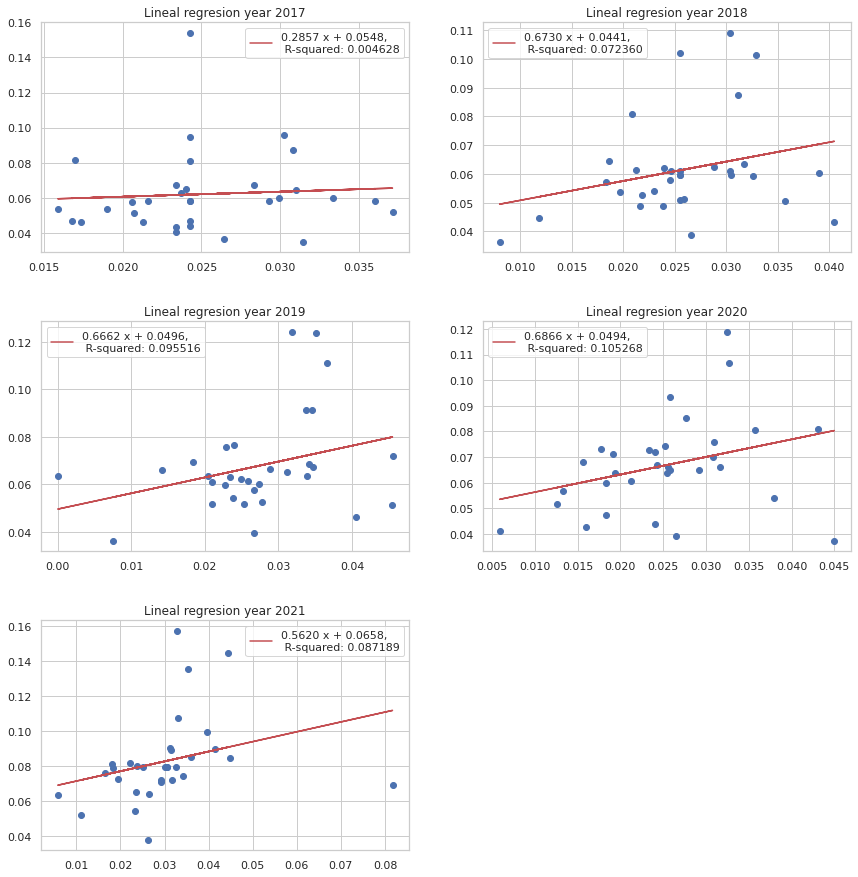

{2017: LinregressResult(slope=0.28569963069347565, intercept=0.05484277800574476, rvalue=0.06802744638787872, pvalue=0.7114272630048609, stderr=0.7649933342351994, intercept_stderr=0.019603653866315632),
 2018: LinregressResult(slope=0.6729841041027997, intercept=0.04410630068947309, rvalue=0.26899816963394746, pvalue=0.1365560713341021, stderr=0.4399310184342412, intercept_stderr=0.011735858240063133),
 2019: LinregressResult(slope=0.6661919955366092, intercept=0.04964728012134845, rvalue=0.3090571474699811, pvalue=0.08522242668077976, stderr=0.3742832211883036, intercept_stderr=0.010775055066277378),
 2020: LinregressResult(slope=0.6866121401270099, intercept=0.049442152507274656, rvalue=0.32445081183333585, pvalue=0.0700301760649755, stderr=0.36546718711270393, intercept_stderr=0.009703541495246463),
 2021: LinregressResult(slope=0.5619587677674086, intercept=0.06578400533042557, rvalue=0.2952784687574271, pvalue=0.10085792743271349, stderr=0.3319727129581854, intercept_stderr=0.010

In [72]:
res = execute_linear_regresion_by_year( df_work ) 
plt.subplots_adjust( wspace = 0.2, hspace= 0.3, right = 2, top = 3)
plt.show()
display( res )

Y para todos los años

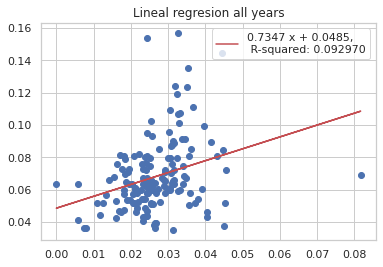

In [73]:
execute_linear_regresion( df_work, "Lineal regresion all years" ) 
plt.show()

Como se puede observar en las diferentes gráficas y los diferentes valores de `R-squared` (el valor máximo es `0,106139`, año 2020) el ajuste es muy malo, cosa que ya se podía intuir cuando se hizo el análisis visual con los diagramas de dipersión.

### [4.3.2.] Estudio de la correlación

Como hemos podido comprobar hasta hora tenemos conjuntos de datos que cumplen la condición de normalidad y homocedasticidad, dataset de los años 2019 y 2021, y el resto no cumplen con esta última condición.

Para los primeros se puede realizar el test de Pearson para realizar un estudio de la correlación y para el resto se puede realizar un test no paramétrico como el Sperman.

#### [4.3.2.1.] Test Pearson

Se puede ejecutar en el caso de que se cumplan las condiciones de normalidad de ambas poblaciones y se cumple la condición de homocedasticidad.

Hipótesis en el test del test Pearson: 

> **Hipótesis nula**, `H_0`: _Hay independencia entre las variables._   
  **Hipótesis alternativa** `H_1`: _Las variables son dependientes._.
  
Se crean la función `test_pearson` que devolverá `True` cuando el resultado del test acepte la hipótesis nula, y `False` cuando las variables sean dependientes. Además escribe por consola el coeficiente de correlación.

Las funciones `execute_test_pearson` y  `execute_test_pearson_by_year` son funciones auxiliares que permiten la ejecución para un sólo conjunto de datos y para ejecutar el test para los subconjuntos de los años en grupo.  

In [74]:
def test_pearson( electricityPrices, gasPrices ):
    coff, pvalue =  stats.pearsonr( electricityPrices, gasPrices )
    print( "  Test Pearson" )
    if pvalue >= 0.05 :
        print( "   The variables are INDEPENDENT.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return True
    else: 
        print( "   The variables are DEPENDANT.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return False
    
def execute_test_pearson( df, title ):
    print( title )
    print( " --- ---" )
    res = test_pearson( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > Are independent both variables? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res

def execute_test_pearson_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_pearson( current_df, "* Test Pearson year %s" % yr ) 
        result[yr] = res
    return result


Se ejecuta el test de Peason para los años que los ambos precios siguen una distribución normal y cumplen el criterio de homocedasticidad (años **2019** y **2021**)

In [75]:
execute_test_pearson_by_year( df_work, [2019, 2021] )

* Test Pearson year 2019
 --- ---
  Test Pearson
   The variables are INDEPENDENT.
    (p-value = 0.08522242668077988, coff = 0.30905714746998114)
 > Are independent both variables? True
 --- --- --- --- --- --- 
* Test Pearson year 2021
 --- ---
  Test Pearson
   The variables are INDEPENDENT.
    (p-value = 0.10085792743271349, coff = 0.29527846875742714)
 > Are independent both variables? True
 --- --- --- --- --- --- 


{2019: True, 2021: True}

La ejecución de los test para ambos conjuntos de datos da como resultado que las variables de los precios de la electricidad y del gas doméstico son **independientes**.

#### [4.3.2.2.] Test Spearman

Es un método no parámetrico para calcular el grado de correlación entre dos variables. No es necesario hacer ninguna suposición con respecto a su distribución pero si que las variables puedan medirse en una  escala ordinal, cosa que si cumplen los precios del gas y la electricidad al ser numéricos.

Hipótesis en el test del test de Spearman: 

> **Hipótesis nula**, `H_0`: _Hay independencia entre las variables._   
  **Hipótesis alternativa** `H_1`: _Las variables son dependientes._.
  
Al igual que el test de Pearson se crean las funciones equivalentes, `test_spearman`, `execute_test_spearman` y `execute_test_spearman_by_year` para ejecutrar el test de Spearman.  

In [76]:
def test_spearman( electricityPrices, gasPrices ):
    coff, pvalue =  stats.spearmanr( electricityPrices, gasPrices )
    print( "  Test Spearman" )
    if pvalue >= 0.05 :
        print( "   The variables are INDEPENDENT.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return True
    else: 
        print( "   The variables are DEPENDANT.\n    (p-value = %s, coff = %s)" %(  pvalue, coff ) )
        return False
    
def execute_test_spearman( df, title ):
    print( title )
    print( " --- ---" )
    res = test_spearman( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > Are independent both variables? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res

def execute_test_spearman_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_spearman( current_df, "* Test Spearman year %s" % yr ) 
        result[yr] = res
    return result


Se estudia la independencia de las variables calculando a través del test de Sperman para aquellos años en los que nos e cumplia la homocedasticidad: 2017, 2018 y 2020

In [77]:
execute_test_spearman_by_year( df_work, [2017, 2018, 2020] )

* Test Spearman year 2017
 --- ---
  Test Spearman
   The variables are INDEPENDENT.
    (p-value = 0.2517799904526953, coff = 0.2086544696883629)
 > Are independent both variables? True
 --- --- --- --- --- --- 
* Test Spearman year 2018
 --- ---
  Test Spearman
   The variables are INDEPENDENT.
    (p-value = 0.23135663911838605, coff = 0.21769108931317935)
 > Are independent both variables? True
 --- --- --- --- --- --- 
* Test Spearman year 2020
 --- ---
  Test Spearman
   The variables are DEPENDANT.
    (p-value = 0.029968095158790668, coff = 0.3841217519645549)
 > Are independent both variables? False
 --- --- --- --- --- --- 


{2017: True, 2018: True, 2020: False}

También se ejecuta este test para el conjunto de todos los años.

In [78]:
execute_test_spearman( df_work, "* Test Spearman all years" )

* Test Spearman all years
 --- ---
  Test Spearman
   The variables are DEPENDANT.
    (p-value = 1.2908109104592066e-05, coff = 0.33730386465737466)
 > Are independent both variables? False
 --- --- --- --- --- --- 


False

Como se puede observar tanto el año 2020 como el conjuto de todos los precios indican que existe una correlación de los precios del gas y la electricidad domésticos, aunque con **valores de correlación pequeños** (`0,38679` y `0.33577` respectivamente).

#### [4.3.2.3.] Conclusiones

Conjunto de datos en los que **no existe** correlación entre las variables de los precios del gas y la electricidad domésticos:
  
 - Año **2017**
 - Año **2018**
 - Año **2019**
 - Año **2021**
 
Conjunto de datos en los que **existe correlación** entre las variables de los precios del gas y la electricidad domésticos:
 
 - Año **2020**
 - **Dataset completo**


### [4.3.3.] Contraste de hipótesis

Como contrate de hipótesis se va a estudiar si entre ambas distribuciones de población no hay diferencias signficativas a nivel estadístico. Hasta ahora tenemos conjuntos de datos siguen una distribución normal y cumplen la condición de la homocedasticidad, y en estas condiciones se aplicará el test t-Student. 

Dentro de los conjuntos de datos que presentan heterocedasticidad existen unos que las variables de los precios del gas y la electricidad son dependientes y otros que no existe correlación. Para los primeros se aplica el test de Mann-Whitney y para cuando hay dependencia entre las variables el test de Wilcoxon.

#### [4.3.3.1.] Test t-Student

Se puede ejecutar en el caso de que se cumplan las condiciones de normalidad de ambas poblaciones y se cumple la condición de homocedasticidad.

Hipótesis en el test de t-Student: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico tienen la misma media._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no** tienen la misma media_.
 
Si las  medias son iguales significa que no hay diferencias significativas a nivel estadístico.

Las funciones `test_tStudent`, `execute_test_tStudent` y `execute_test_tStudent_by_year` siguen la misma filosofía que las funciones de los test anteriores.  

In [79]:
def test_tStudent( electricityPrices, gasPrices ):
    st, pvalue =  stats.ttest_ind( electricityPrices, gasPrices )
    print(  "  Test t-Studen" )
    if pvalue >= 0.05 :
        print( "   The mean are the SAME in both populations.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   The population means are DIFFERENT.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_tStudent( df, title ):
    print( title )
    print( " --- ---" )
    res = test_tStudent( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > Is the population means the same? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_tStudent_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_tStudent( current_df, "* Test t-Student year %s" % yr ) 
        result[yr] = res
    return result


Se ejecutan el test t-Student en los años en los que se ha comprobado que las distribuciones son normales y existe la homocedasticidad: **2019** y **2021**

In [80]:
execute_test_tStudent_by_year( df_work, [2019, 2021])

* Test t-Student year 2019
 --- ---
  Test t-Studen
   The population means are DIFFERENT.
    (p-value = 1.2687094149120352e-14, stats = 10.04200994508563)
 > Is the population means the same? False
 --- --- --- --- --- --- 
* Test t-Student year 2021
 --- ---
  Test t-Studen
   The population means are DIFFERENT.
    (p-value = 1.01892757796314e-15, stats = 10.70124094617887)
 > Is the population means the same? False
 --- --- --- --- --- --- 


{2019: False, 2021: False}

En ambos casos de conjunto de datos (**2019** y **2021**) existen diferencias signficativas entre las dos poblaciones de los precios: gas y electricidad.

#### [4.3.3.2.] Test de Mann-Whitney

El test de Mann-Whitney se puede aplicar cuando no se cumplen alguna de las condiciones de ajuste a una distribución normal y de homocedasticidad. Se aplica cuando las dos variables son **independientes**.

Hipótesis en el test de Mann-Whitney: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_.
  
Si las medias son iguales significa que no hay diferencias significativas a nivel estadístico.

Las funciones `test_mannWhitney`, `execute_test_mannWhitney` y `execute_test_test_mannWhitney_by_year` son parecidas a funciones similares que se han codificado para la ejecución de test anteriores, en este caso codificadas para ejecutar el test de Mann-Whitney.


In [81]:
def test_mannWhitney( electricityPrices, gasPrices ):
    st, pvalue =  stats.mannwhitneyu( electricityPrices, gasPrices )
    print(  "  Test Mann-Whitney" )
    if pvalue >= 0.05 :
        print( "   The mean are the SAME in both populations.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   The population means are DIFFERENT.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_mannWhitney( df, title ):
    print( title )
    print( " --- ---" )
    res = test_mannWhitney( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( " > Is the population means the same? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res
    
def execute_test_test_mannWhitney_by_year( df, years ):
    result = {}
    for yr in years :
        current_df = filter_by_year( df, yr )
        res =  execute_test_mannWhitney( current_df, "* Test Mann-Whitney year %s" % yr ) 
        result[yr] = res
    return result


Se ejecuta el test de Mann-Whitney para los precios de aquellos años que no cumplen la condición de homocedasticidad y que las variables son independientes. Esto ocurría en los años 2017 y 2018.

In [82]:
execute_test_test_mannWhitney_by_year( df_work, [2017, 2018] )

* Test Mann-Whitney year 2017
 --- ---
  Test Mann-Whitney
   The population means are DIFFERENT.
    (p-value = 8.300422863844184e-12, stats = 1021.0)
 > Is the population means the same? False
 --- --- --- --- --- --- 
* Test Mann-Whitney year 2018
 --- ---
  Test Mann-Whitney
   The population means are DIFFERENT.
    (p-value = 9.345965564544273e-12, stats = 1020.0)
 > Is the population means the same? False
 --- --- --- --- --- --- 


{2017: False, 2018: False}

#### [4.3.3.3.] Test de Wilcoxon

El test de Wilcoxon se puede aplicar cuando no se cumplen alguna de las condiciones de ajuste a una distribución normal y de homocedasticidad. Se aplica cuando las dos variables son **dependientes**.

Hipótesis en el test de Wilcoxon: 

> **Hipótesis nula**, `H_0`: _Las distribuciones de los precios de la electricidad y del gas doméstico son iguales._   
  **Hipótesis alternativa** `H_1`:  _Las distribuciones de los precios de la electricidad y del gas doméstico **no**
  son iguales_. 
  
Si las medias son iguales significa que no hay diferencias significativas a nivel estadístico.

Las funciones `test_wilcoxon` y `execute_test_wilcoxon` son parecidas a funciones similares que se han codificado para la ejecución de test anteriores, en este caso codificadas para ejecutar el test de Wilcoxon.


In [83]:
def test_wilcoxon( electricityPrices, gasPrices ):
    st, pvalue =  stats.wilcoxon( electricityPrices, gasPrices )
    print(  "  Test Wilcoxon" )
    if pvalue >= 0.05 :
        print( "   The mean are the SAME in both populations.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return True
    else: 
        print( "   The population means are DIFFERENT.\n    (p-value = %s, stats = %s)" %(  pvalue, st ) )
        return False
    
def execute_test_wilcoxon( df, title ):
    print( title )
    print( " --- ---" )
    res = test_wilcoxon( get_electricityPrice( df ), get_gasPriceValues( df ) )
    print( "  Is the population means the same? %s" % res )
    print( " --- --- --- --- --- --- " ) 
    return res


Se ejecuta el test de Wilcoxon para los precios relativos al año **2020**, ya que no cumplía la condición de homocedasticidad y las dos variables tenían un grado de dependencia.

In [84]:
execute_test_wilcoxon( filter_by_year(df_work, 2020), "* Test Wilcoxon year 2020")

* Test Wilcoxon year 2020
 --- ---
  Test Wilcoxon
   The population means are DIFFERENT.
    (p-value = 8.75128034540769e-07, stats = 1.0)
  Is the population means the same? False
 --- --- --- --- --- --- 


False

También el **conjunto de los precios de todos los años** no cumplía la condición de homocedasticidad y las dos variables con un grado de correlación, en este casoo se aplica también el test de Wilcoxon.

In [85]:
execute_test_wilcoxon( df_work, "* Test Wilcoxon all years")

* Test Wilcoxon all years
 --- ---
  Test Wilcoxon
   The population means are DIFFERENT.
    (p-value = 6.817011882495214e-28, stats = 14.0)
  Is the population means the same? False
 --- --- --- --- --- --- 


False

#### [4.3.3.4.] Conclusiones

La ejecución de todos los conjuntos de datos indican que todos los conjuntos de datos propuestos donde los datos de los precios del gas y la electricidad domésticos tienen diferencias significativas entre ambas poblaciones

# [5.] Conclusiones finales

Como resumén de los resultados obtenidos llegamos a la conclusión que todas las poblaciones tienden a una distribución normal, siendo la mayoria de los precios del gas una distribución normal. El año 2020 es el que ambas distribuciones siguen una distribución normal según el test de Shapiro-Wil.

Los conjuntos de precios que tienen homogeneidad de las varianzas son los de los años 2019 y 2021, mientras que el resto de conjuntos de datos no cumplen esta condición. Los diagramas de dispersión muestran una distribución uniforme y los modelos de regresión lineal dan un valor `R²` muy pobre, lo que quiere decir en que no hay una dependencia lineal entre las dos poblaciones de  precios.

Con respecto a la correlación sólo los precios del año 2020 y el dataset completo muestran una correlación aunque con coeficientes de correlación pequeños. Por último el contraste de hipótesis utilizado para demostrar que ambas distribuciones son diferentes lo ha confirmado en todos los conjuntos de datos.

Como conclusión final existe una pequeña correlación entre los precios del gas y la electricidad domésticos pero no que en un principio se pudiera creer.